In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.model_selection import LearningCurve

In [2]:
from google.colab import files

uploaded = files.upload()  # Akan membuka dialog untuk mengunggah file


Saving heart.csv to heart.csv


In [3]:
df = pd.read_csv('heart.csv')  # Gunakan nama file sesuai yang diunggah
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# -- Dataset Information --
print('Total Rows\t:', df.shape[0])
print('Total Columns\t:', df.shape[1])

Total Rows	: 918
Total Columns	: 12


In [5]:
# -- Dataset Summary --
df.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)

In [6]:
# -- Null Values --
print(df.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [7]:
# -- Duplicated Data --
print(df.duplicated().sum())

0


**EKSPLORASI DATA**

**1. Data Kategorikal**

Kolom data yang termasuk ke dalam data kategorikal antara lain:
Sex,
ChestPainType,
FastingBS,
RestingECG,
ExerciseAngina,
ST_Slope

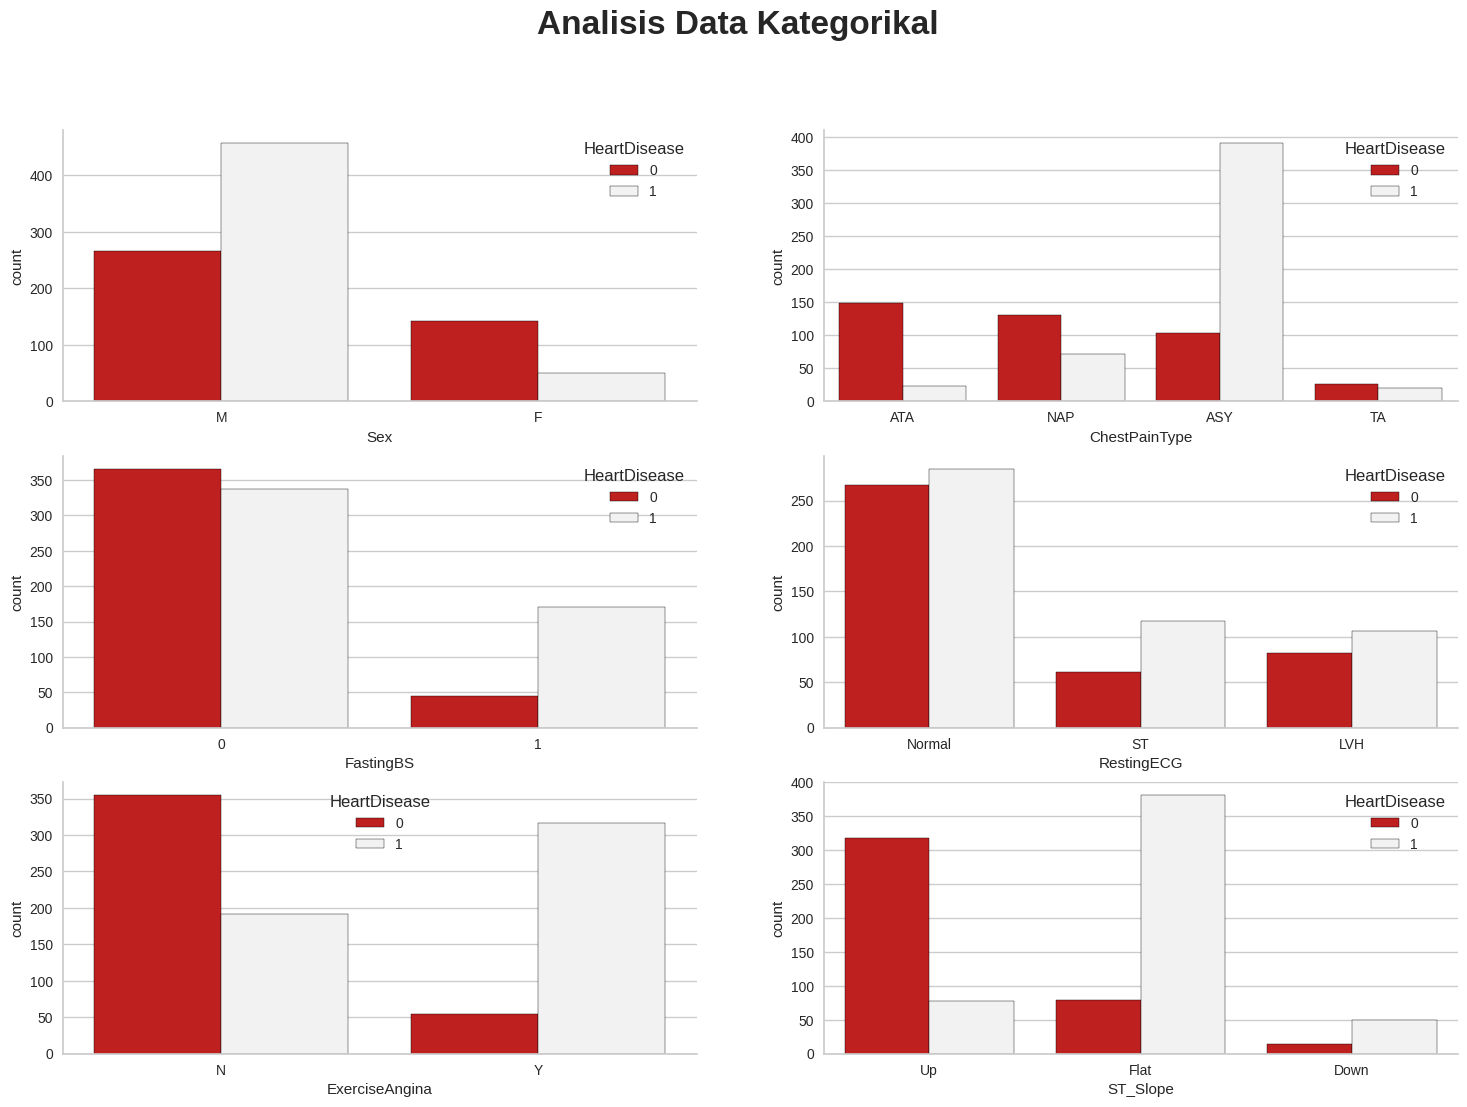

In [8]:
# -- Konfigurasi Warna --
colors = ['#D90404', '#F2F2F2']

# -- Figur --
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(3,2)
plt.suptitle("Analisis Data Kategorikal", fontweight='heavy', fontsize='24')

# -- Bar Chart --
ax_sex = fig.add_subplot(gs[0,0])
sns.countplot(x='Sex', hue='HeartDisease', data=df, ax=ax_sex, palette=colors, edgecolor='#000000')
sns.despine()

ax_chestpaintype = fig.add_subplot(gs[0,1])
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, ax=ax_chestpaintype, palette=colors, edgecolor='#000000')
sns.despine()

ax_fastingbs = fig.add_subplot(gs[1,0])
sns.countplot(x='FastingBS', hue='HeartDisease', data=df, ax=ax_fastingbs, palette=colors, edgecolor='#000000')
sns.despine()

ax_restingecg = fig.add_subplot(gs[1,1])
sns.countplot(x='RestingECG', hue='HeartDisease', data=df, ax=ax_restingecg, palette=colors, edgecolor='#000000')
sns.despine()

ax_exerciseangina = fig.add_subplot(gs[2,0])
sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=df, ax=ax_exerciseangina, palette=colors, edgecolor='#000000')
sns.despine()

ax_stslope = fig.add_subplot(gs[2,1])
sns.countplot(x='ST_Slope', hue='HeartDisease', data=df, ax=ax_stslope, palette=colors, edgecolor='#000000')
sns.despine()

plt.show()

**2. Data Numerikal**

Kolom data yang termasuk ke dalam data numerikal antara lain:
Age,
Cholesterol,
FastingBS,
MaxHR,
Oldpeak

<ipython-input-9-558f9caffd5f>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Age', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_age, palette=colors, shade=True)
<ipython-input-9-558f9caffd5f>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='RestingBP', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_restingbp, palette=colors, shade=True)
<ipython-input-9-558f9caffd5f>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Cholesterol', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_cholesterol, palette=colors, shade=True)
<ipython-input-9-558f

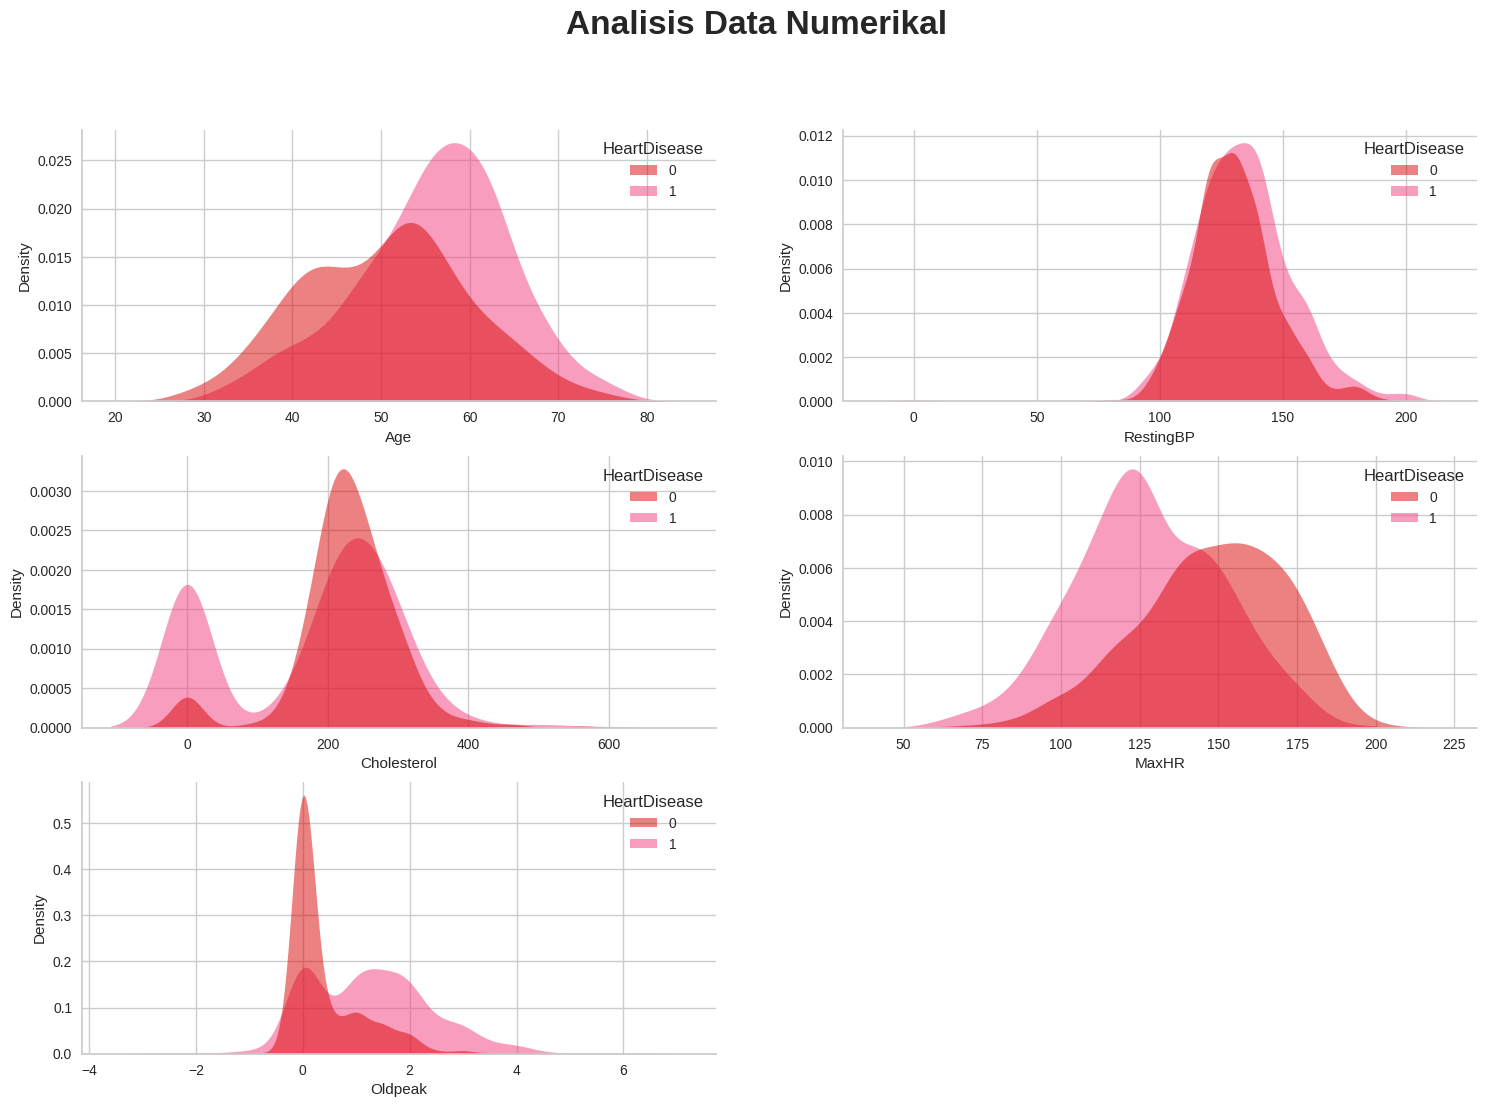

In [9]:
# -- Konfigurasi Warna --
colors = ['#D90404', '#F23D7F']

# -- Figur --
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(3,2)
plt.suptitle("Analisis Data Numerikal", fontweight='heavy', fontsize='24')

# -- KDE Plot --
ax_age = fig.add_subplot(gs[0,0])
sns.kdeplot(x='Age', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_age, palette=colors, shade=True)
sns.despine()

ax_restingbp = fig.add_subplot(gs[0,1])
sns.kdeplot(x='RestingBP', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_restingbp, palette=colors, shade=True)
sns.despine()

ax_cholesterol = fig.add_subplot(gs[1,0])
sns.kdeplot(x='Cholesterol', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_cholesterol, palette=colors, shade=True)
sns.despine()

ax_maxhr = fig.add_subplot(gs[1,1])
sns.kdeplot(x='MaxHR', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_maxhr, palette=colors, shade=True)
sns.despine()

ax_oldpeak = fig.add_subplot(gs[2,0])
sns.kdeplot(x='Oldpeak', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_oldpeak, palette=colors, shade=True)
sns.despine()

plt.show()

<ipython-input-10-e5eb2c2b203e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=df, palette=colors, edgecolor='#000000')


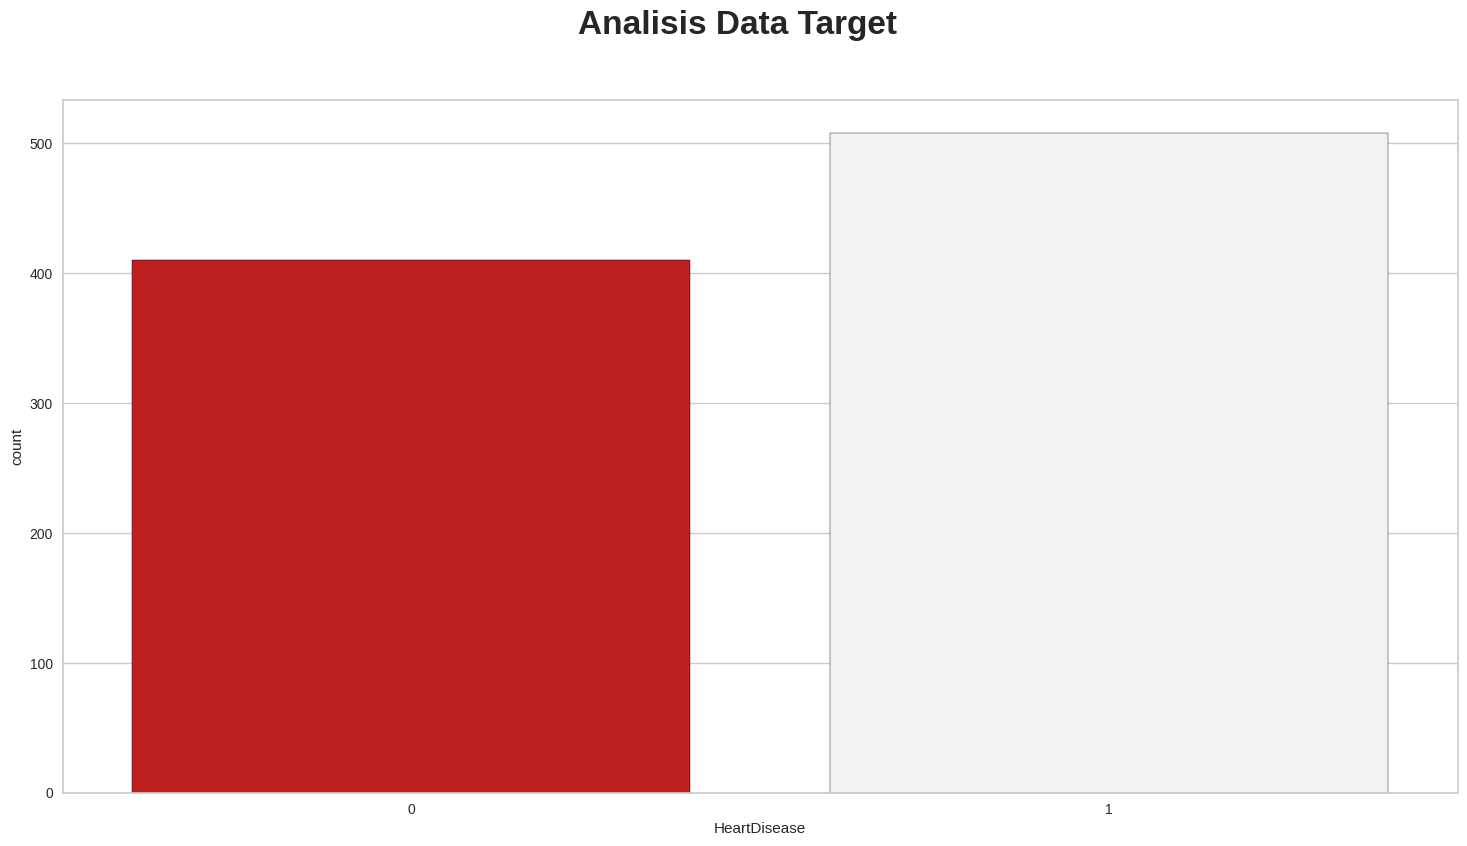

In [10]:
# -- Konfigurasi Warna --
colors = ['#D90404', '#F2F2F2']

# -- Figur --
plt.figure(figsize=(18,9))
plt.suptitle("Analisis Data Target", fontweight='heavy', fontsize='24')

# -- Bar Chart --
sns.countplot(x='HeartDisease', data=df, palette=colors, edgecolor='#000000')

plt.show()

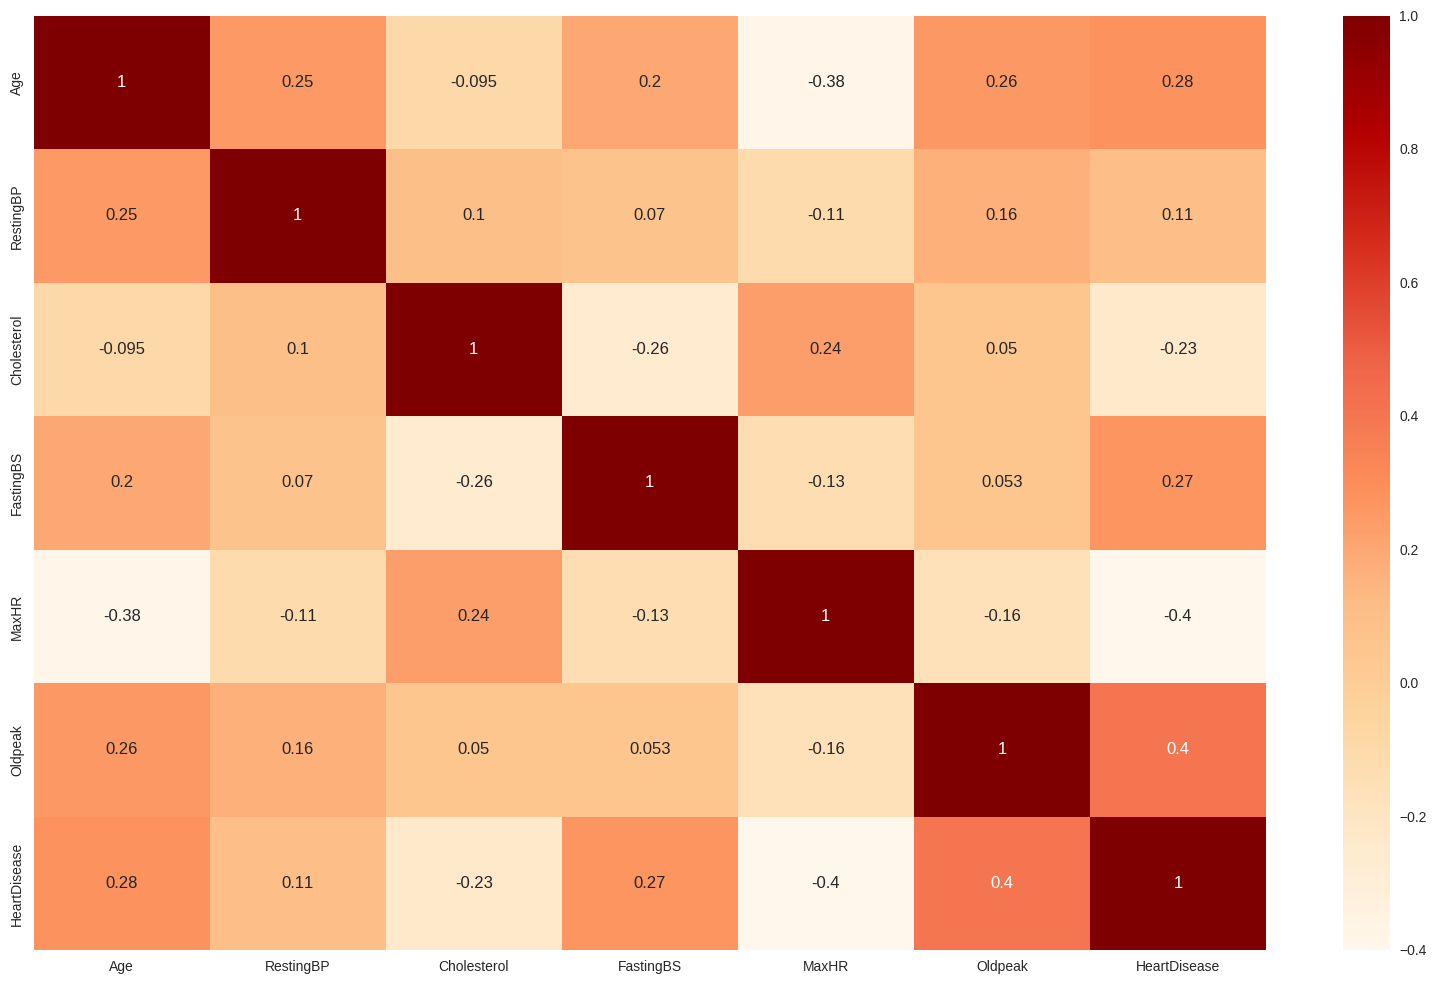

In [11]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='OrRd')
plt.tight_layout()
plt.show()

**DATA PRA PROSES**

**1. One-Hot Encoding**

In [12]:
sex = pd.get_dummies(df['Sex'], prefix='Sex', dtype='int64')
chestpaintype = pd.get_dummies(df['ChestPainType'], prefix='ChestPainType', dtype='int64')
restingecg = pd.get_dummies(df['RestingECG'], prefix='RestingECG', dtype='int64')
exerciseangina = pd.get_dummies(df['ExerciseAngina'], prefix='ExerciseAngina', dtype='int64')
stslope = pd.get_dummies(df['ST_Slope'], prefix='ST_Slope', dtype='int64')

frames = [df, sex, chestpaintype, restingecg, exerciseangina, stslope]
enc_df = pd.concat(frames, axis=1)

enc_df.head().style.background_gradient(cmap='OrRd').hide()

Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
40,M,ATA,140,289,0,Normal,172,N,0.000000,Up,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
49,F,NAP,160,180,0,Normal,156,N,1.000000,Flat,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
37,M,ATA,130,283,0,ST,98,N,0.000000,Up,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
48,F,ASY,138,214,0,Normal,108,Y,1.500000,Flat,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
54,M,NAP,150,195,0,Normal,122,N,0.000000,Up,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


**2. Menghapus Data yang Tidak Perlu**

In [13]:
enc_df = enc_df.drop(columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
enc_df.head().style.background_gradient(cmap='OrRd').hide()

Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
40,140,289,0,172,0.000000,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
49,160,180,0,156,1.000000,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
37,130,283,0,98,0.000000,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
48,138,214,0,108,1.500000,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
54,150,195,0,122,0.000000,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


**3. Pemisahan Fitur**

In [14]:
x = enc_df.drop(['HeartDisease'], axis=1)
y = enc_df['HeartDisease']


**4. Normalisasi Data**

In [15]:
x = StandardScaler().fit_transform(x)

**5. Pemisahan Data**

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**IMPLEMENTASI MODEL**

**1. Decision Tree Classifier**

In [17]:
# -- Model Fit --
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=0)
dt_clf.fit(x_train, y_train)

y_pred_dt = dt_clf.predict(x_test)

In [18]:
# -- Skor Akurasi --
dt_acc = accuracy_score(y_pred_dt, y_test)
print('Akurasi Model Decision Tree Classifier: '+'{:.2f}'.format(dt_acc*100)+'\n')

print('Classification Report\n')
print(classification_report(y_test, y_pred_dt))

Akurasi Model Decision Tree Classifier: 86.41

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       0.90      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



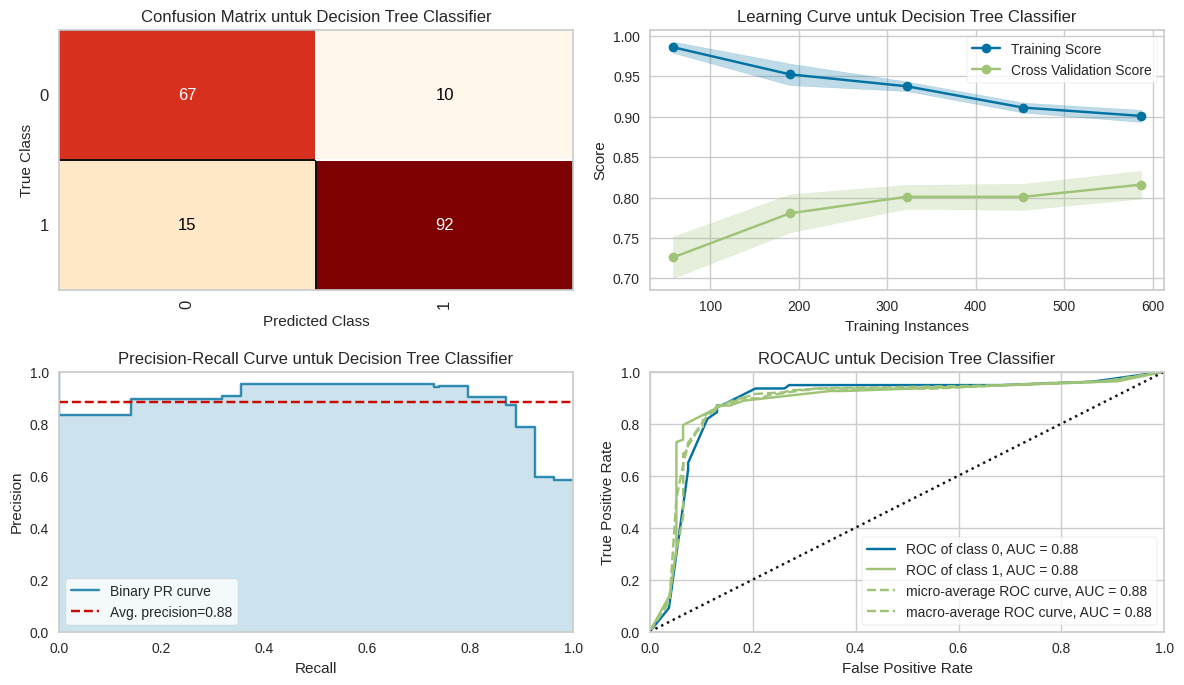

In [19]:
# -- Figur --
fig = plt.figure(figsize=(12,10))

# -- Confusion Matrix --
ax_cm = fig.add_subplot(gs[0,0])
dt_cm = ConfusionMatrix(dt_clf, ax=ax_cm, cmap='OrRd', title='Confusion Matrix untuk Decision Tree Classifier')
dt_cm.fit(x_train, y_train)
dt_cm.score(x_test, y_test)
dt_cm.finalize()

# -- Learning Curve --
ax_lc = fig.add_subplot(gs[0,1])
dt_lc = LearningCurve(dt_clf, ax=ax_lc, title='Learning Curve untuk Decision Tree Classifier')
dt_lc.fit(x_train, y_train)
dt_lc.finalize()

# -- Precision-Recall Curve --
ax_prc = fig.add_subplot(gs[1,0])
dt_prc = PrecisionRecallCurve(dt_clf, ax=ax_prc, title='Precision-Recall Curve untuk Decision Tree Classifier')
dt_prc.fit(x_train, y_train)
dt_prc.score(x_test, y_test)
dt_prc.finalize()

# -- ROCAUC --
ax_rocauc = fig.add_subplot(gs[1,1])
dt_rocauc = ROCAUC(dt_clf, ax=ax_rocauc, title='ROCAUC untuk Decision Tree Classifier')
dt_rocauc.fit(x_train, y_train)
dt_rocauc.score(x_test, y_test)
dt_rocauc.finalize()

plt.tight_layout()
plt.show()

**2. AdaBoost Classifier**

In [20]:
# -- Model Fit --
ab_clf = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=0)
ab_clf.fit(x_train, y_train)

y_pred_ab = ab_clf.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


In [21]:
# -- Skor Akurasi --
ab_acc = accuracy_score(y_pred_ab, y_test)
print('Akurasi Model AdaBoost Classifier: '+'{:.2f}'.format(ab_acc*100)+'\n')

print('Classification Report\n')
print(classification_report(y_test, y_pred_ab))

Akurasi Model AdaBoost Classifier: 86.96

Classification Report

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        77
           1       0.92      0.85      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 

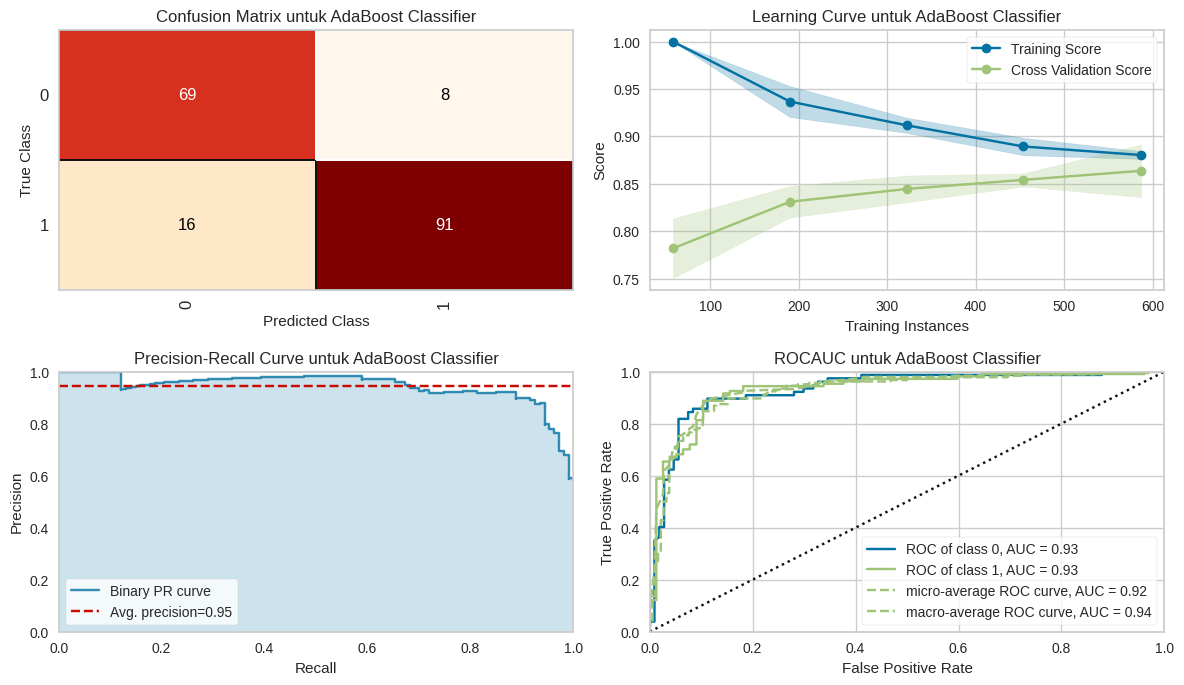

In [22]:
# -- Figur --
fig = plt.figure(figsize=(12,10))

# -- Confusion Matrix --
ax_cm = fig.add_subplot(gs[0,0])
ab_cm = ConfusionMatrix(ab_clf, ax=ax_cm, cmap='OrRd', title='Confusion Matrix untuk AdaBoost Classifier')
ab_cm.fit(x_train, y_train)
ab_cm.score(x_test, y_test)
ab_cm.finalize()

# -- Learning Curve --
ax_lc = fig.add_subplot(gs[0,1])
ab_lc = LearningCurve(ab_clf, ax=ax_lc, title='Learning Curve untuk AdaBoost Classifier')
ab_lc.fit(x_train, y_train)
ab_lc.finalize()

# -- Precision-Recall Curve --
ax_prc = fig.add_subplot(gs[1,0])
ab_prc = PrecisionRecallCurve(ab_clf, ax=ax_prc, title='Precision-Recall Curve untuk AdaBoost Classifier')
ab_prc.fit(x_train, y_train)
ab_prc.score(x_test, y_test)
ab_prc.finalize()

# -- ROCAUC --
ax_rocauc = fig.add_subplot(gs[1,1])
ab_rocauc = ROCAUC(ab_clf, ax=ax_rocauc, title='ROCAUC untuk AdaBoost Classifier')
ab_rocauc.fit(x_train, y_train)
ab_rocauc.score(x_test, y_test)
ab_rocauc.finalize()

plt.tight_layout()
plt.show()


**3. K-Nearest Neighbors Classifier**

In [23]:
# -- Model Fit --
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train, y_train)

y_pred_knn = knn_clf.predict(x_test)

In [24]:
# -- Skor Akurasi --
knn_acc = accuracy_score(y_pred_knn, y_test)
print('Model Akurasi K-Nearest Neighbors Classifier: '+'{:.2f}'.format(knn_acc*100)+'\n')

print('Classification Report\n')
print(classification_report(y_test, y_pred_knn))

Model Akurasi K-Nearest Neighbors Classifier: 82.61

Classification Report

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        77
           1       0.90      0.79      0.84       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.82       184
weighted avg       0.84      0.83      0.83       184



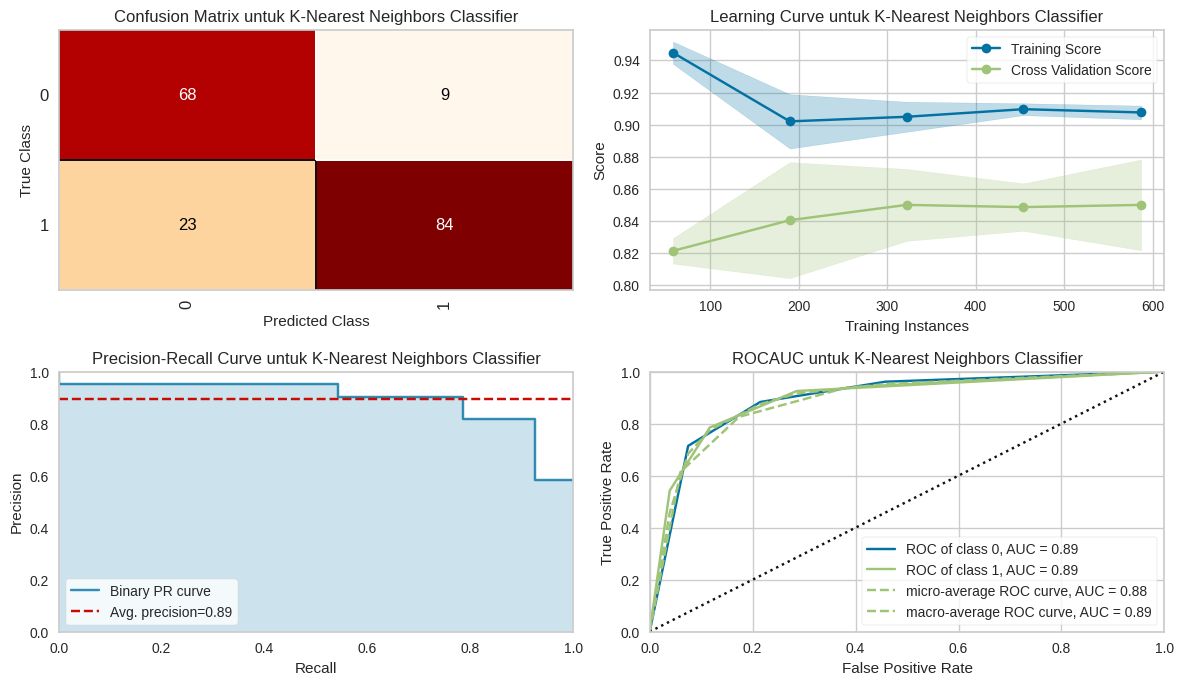

In [25]:
# -- Figur --
fig = plt.figure(figsize=(12,10))

# -- Confusion Matrix --
ax_cm = fig.add_subplot(gs[0,0])
knn_cm = ConfusionMatrix(knn_clf, ax=ax_cm, cmap='OrRd', title='Confusion Matrix untuk K-Nearest Neighbors Classifier')
knn_cm.fit(x_train, y_train)
knn_cm.score(x_test, y_test)
knn_cm.finalize()

# -- Learning Curve --
ax_lc = fig.add_subplot(gs[0,1])
knn_lc = LearningCurve(knn_clf, ax=ax_lc, title='Learning Curve untuk K-Nearest Neighbors Classifier')
knn_lc.fit(x_train, y_train)
knn_lc.finalize()

# -- Precision-Recall Curve --
ax_prc = fig.add_subplot(gs[1,0])
knn_prc = PrecisionRecallCurve(knn_clf, ax=ax_prc, title='Precision-Recall Curve untuk K-Nearest Neighbors Classifier')
knn_prc.fit(x_train, y_train)
knn_prc.score(x_test, y_test)
knn_prc.finalize()

# -- ROCAUC --
ax_rocauc = fig.add_subplot(gs[1,1])
knn_rocauc = ROCAUC(knn_clf, ax=ax_rocauc, title='ROCAUC untuk K-Nearest Neighbors Classifier')
knn_rocauc.fit(x_train, y_train)
knn_rocauc.score(x_test, y_test)
knn_rocauc.finalize()

plt.tight_layout()
plt.show()

**KOMPARASI**

In [26]:
compare = pd.DataFrame({'Model': ['Decision Tree Classifier', 'AdaBoost Classifier', 'K-Nearest Neighbors Classifier'],
                       'Akurasi': [dt_acc*100, ab_acc*100, knn_acc*100]})
compare.sort_values(by='Akurasi', ascending=False).style.background_gradient(cmap='OrRd').hide()

Model,Akurasi
AdaBoost Classifier,86.956522
Decision Tree Classifier,86.413043
K-Nearest Neighbors Classifier,82.608696


MODEL **TUNING**

In [27]:
n_estimators = [50, 100, 150, 200, 250]
learning_r = [0.001, 0.01, 0.1, 0.5, 1]
parameters = {'n_estimators': n_estimators, 'learning_rate': learning_r}

cv = StratifiedKFold(n_splits=5)
ab_grid = GridSearchCV(AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=0),
                  param_grid=parameters, cv=cv, n_jobs=-1, error_score='raise')

ab_grid.fit(x_train, y_train)
y_pred_ab_grid = ab_grid.predict(x_test)


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


In [28]:
# -- Skor Akurasi --
ab_grid_acc = accuracy_score(y_pred_ab_grid, y_test)
print('Model Akurasi AdaBoost Classifier dengan GridSearchCV: '+'{:.2f}'.format(ab_grid_acc*100)+'\n')

print('Classification Report\n')
print(classification_report(y_test, y_pred_ab_grid))

Model Akurasi AdaBoost Classifier dengan GridSearchCV: 85.87

Classification Report

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



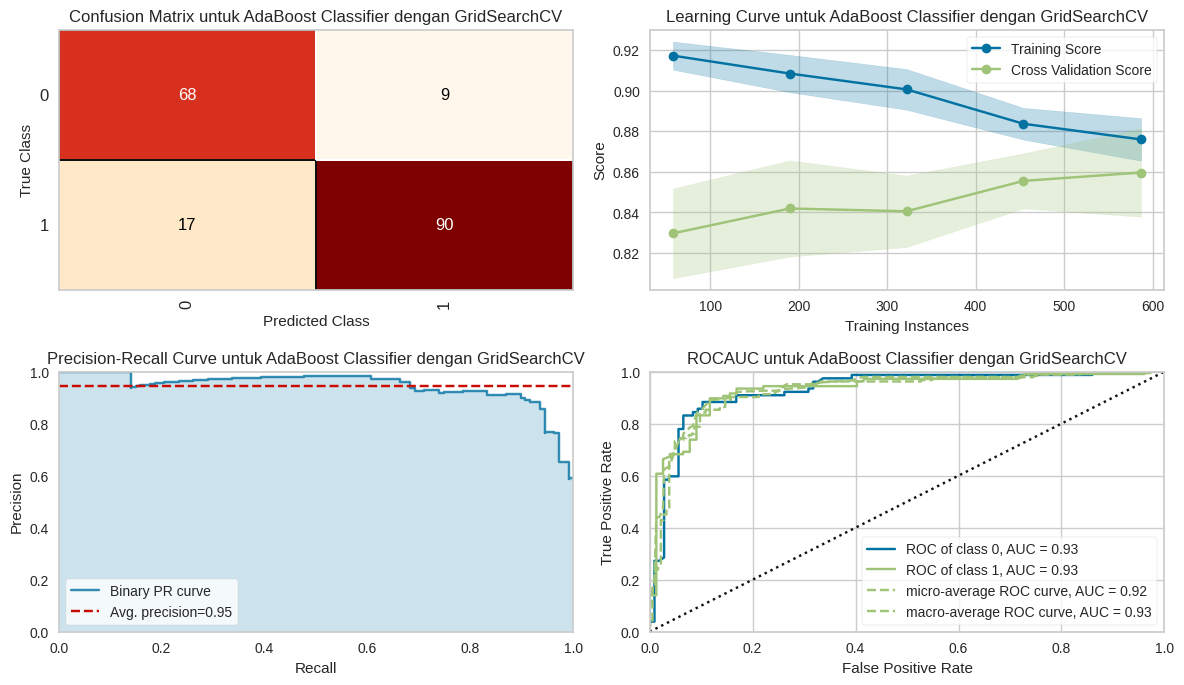

In [29]:
# -- Figur --
fig = plt.figure(figsize=(12,10))

# -- Confusion Matrix --
ax_cm = fig.add_subplot(gs[0,0])
ab_grid_cm = ConfusionMatrix(ab_grid, ax=ax_cm, cmap='OrRd', title='Confusion Matrix untuk AdaBoost Classifier dengan GridSearchCV')
ab_grid_cm.fit(x_train, y_train)
ab_grid_cm.score(x_test, y_test)
ab_grid_cm.finalize()

# -- Learning Curve --
ax_lc = fig.add_subplot(gs[0,1])
ab_grid_lc = LearningCurve(ab_grid, ax=ax_lc, title='Learning Curve untuk AdaBoost Classifier dengan GridSearchCV')
ab_grid_lc.fit(x_train, y_train)
ab_grid_lc.finalize()

# -- Precision-Recall Curve --
ax_prc = fig.add_subplot(gs[1,0])
ab_grid_prc = PrecisionRecallCurve(ab_grid, ax=ax_prc, title='Precision-Recall Curve untuk AdaBoost Classifier dengan GridSearchCV')
ab_grid_prc.fit(x_train, y_train)
ab_grid_prc.score(x_test, y_test)
ab_grid_prc.finalize()

# -- ROCAUC --
ax_rocauc = fig.add_subplot(gs[1,1])
ab_grid_rocauc = ROCAUC(ab_grid, ax=ax_rocauc, title='ROCAUC untuk AdaBoost Classifier dengan GridSearchCV')
ab_grid_rocauc.fit(x_train, y_train)
ab_grid_rocauc.score(x_test, y_test)
ab_grid_rocauc.finalize()

plt.tight_layout()
plt.show()

In [30]:
hasil = pd.DataFrame({'Model': ['AdaBoost Classifier', 'AdaBoost Classifier dengan GridSearchCV'],
                       'Akurasi': [ab_acc*100, ab_grid_acc*100]})
hasil.sort_values(by='Akurasi', ascending=False).style.background_gradient(cmap='OrRd').hide()

Model,Akurasi
AdaBoost Classifier,86.956522
AdaBoost Classifier dengan GridSearchCV,85.869565


PREDIKSI

In [31]:
# -- Men-generate data secara random --
test = [[40, 120, 180, 0, 170,
    0.5, 1, 0, 0, 0,
    1, 0, 0, 1, 0,
    1, 0, 0, 0, 1                    ## ExerciseAngina_N, ExerciseAngina_Y, ST_Slope_Down, ST_Slope_Flat, ST_Slope_Up
        ]]

# -- Prediksi menggunakan AdaBoost Classifier dengan GridSearchCV --
result = ab_grid.predict(test)

if result[0] == 1:
    print('Terdeteksi Penyakit Jantung!')
else:
    print('Tidak Terdeteksi Penyakit Jantung!')


Tidak Terdeteksi Penyakit Jantung!
